This notebook shows how people can work with functions in DataProcess/variable_selection_extraction.py to get three different data set for each output used in SVR model.

In [11]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

All the row data comes from TrainingData.csv got from ExtracMethod/get_all_trainingdata.py

In [12]:
trainset = pd.read_csv('../kratosbat/Data/TrainingData.csv')
trainset.shape

(4401, 95)

Next we will transfer the data in String-type to a binary value.

In [13]:

lb = preprocessing.LabelBinarizer()
wi=lb.fit_transform(np.array(trainset.loc[:,['Working Ion']]))
cs=lb.fit_transform(np.array(trainset.loc[:,['Crystal System']]))
sn=lb.fit_transform(np.array(trainset.loc[:,['Spacegroup Number']]))
el=np.array(trainset.loc[:,['mean_Number', 'mean_MendeleevNumber',
                       'mean_AtomicWeight', 'mean_MeltingT', 'mean_Column', 'mean_Row',
                       'mean_CovalentRadius', 'mean_Electronegativity', 'mean_NsValence',
                       'mean_NpValence', 'mean_NdValence', 'mean_NfValence', 'mean_NValance',
                       'mean_NsUnfilled', 'mean_NpUnfilled', 'mean_NdUnfilled',
                       'mean_NfUnfilled', 'mean_NUnfilled', 'mean_GSvolume_pa',
                       'mean_GSbandgap', 'mean_GSmagmom', 'mean_SpaceGroupNumber',
                       'dev_Number', 'dev_MendeleevNumber', 'dev_AtomicWeight', 'dev_MeltingT',
                       'dev_Column', 'dev_Row', 'dev_CovalentRadius', 'dev_Electronegativity',
                       'dev_NsValence', 'dev_NpValence', 'dev_NdValence', 'dev_NfValence',
                       'dev_NValance', 'dev_NsUnfilled', 'dev_NpUnfilled', 'dev_NdUnfilled',
                       'dev_NfUnfilled', 'dev_NUnfilled', 'dev_GSvolume_pa', 'dev_GSbandgap',
                       'dev_GSmagmom', 'dev_SpaceGroupNumber', 'mean_Number.1',
                       'mean_MendeleevNumber.1', 'mean_AtomicWeight.1', 'mean_MeltingT.1',
                       'mean_Column.1', 'mean_Row.1', 'mean_CovalentRadius.1',
                       'mean_Electronegativity.1', 'mean_NsValence.1', 'mean_NpValence.1',
                       'mean_NdValence.1', 'mean_NfValence.1', 'mean_NValance.1',
                       'mean_NsUnfilled.1', 'mean_NpUnfilled.1', 'mean_NdUnfilled.1',
                       'mean_NfUnfilled.1', 'mean_NUnfilled.1', 'mean_GSvolume_pa.1',
                       'mean_GSbandgap.1', 'mean_GSmagmom.1', 'mean_SpaceGroupNumber.1',
                       'dev_Number.1', 'dev_MendeleevNumber.1', 'dev_AtomicWeight.1',
                       'dev_MeltingT.1', 'dev_Column.1', 'dev_Row.1', 'dev_CovalentRadius.1',
                       'dev_Electronegativity.1', 'dev_NsValence.1', 'dev_NpValence.1',
                       'dev_NdValence.1', 'dev_NfValence.1', 'dev_NValance.1',
                       'dev_NsUnfilled.1', 'dev_NpUnfilled.1', 'dev_NdUnfilled.1',
                       'dev_NfUnfilled.1', 'dev_NUnfilled.1', 'dev_GSvolume_pa.1',
                       'dev_GSbandgap.1', 'dev_GSmagmom.1', 'dev_SpaceGroupNumber.1']])
prop=np.hstack((wi, cs, sn, el))
ss = StandardScaler()
pss = ss.fit_transform(prop)
standard_data = pd.DataFrame(pss)
standard_data.head(10)
print(wi.shape, cs.shape,sn.shape)

(4401, 10) (4401, 7) (4401, 136)


Here we extract target value work as a Dataframe.

In [16]:
outputs=pd.read_csv('../kratosbat/Data/NEWTrainingData_StandardScaler.csv').loc[:,['Gravimetric Capacity (units)', 'Volumetric Capacity', 'Max Delta Volume']]
outputs.shape

(4401, 3)

In [21]:
X_train,y_train = standard_data,outputs

Then we process three output seperately. First we use RFE funtion in sklearn package with linear-SVR model to determine how many important features shall we keep in further model-training.

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 28 19 11  1  1  1  1 20  1  1 14 15
  1  1  1  1 16 13  1 24  1  1 25  1  1  1  1  1  2  1  1  1  1  1 33  1
  1  1  1  1 27  1  1 12  1 10  1 18  1  1 17  1 29 34  1  1  1  1  1  1
 31  1  1  1  1 32  1  1  1  1  9 22  5  1  1  1  8  1 26  1  1  7  1 30
  3  1  1  1 21  1  1  1  1  1  6  1  1  1  1  1  1  1  1  1  1 23  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1]


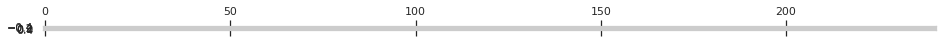

In [22]:

#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
# a coef_ attribute or a feature_importances_ attribute
# RFE can delete the less important features stepwise up to get the number of feature we want.
select1 = RFE(SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1), n_features_to_select=208)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)


GC_df = pd.DataFrame(select1.fit_transform(X_train, y_train['Gravimetric Capacity (units)']))
print(select1.ranking_)
GC_df.to_csv('../kratosbat/Data/DataForSVR/GC_data.csv')
# visualize the selected features:
mask1 = select1.get_support()
plt.matshow(mask1.reshape(1, -1), cmap='gray_r')

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  8
  1  1  1  1  1  1  1 10 26  1  1  1 27 20  1  1  1  1  1  1  1  1  1 14
  1  1 22  1 21  1 18 30  1  1 35 34  1  1  1  1  1  1  1  1  1 11  1  1
  1 16 24  1  1  5 13  1  1  1  1 25  1  1 15  1  1 32  1  1  1  1  1  1
  7  1  1  1 28  1  1  1  1  1  4  9 23  1  1  1  1  1  1 19  1  2 17 29
  1  1  1  1  1  1  1  1  3  1 31  1  1  1  1  6  1  1  1  1  1 33  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 12  1  1  1  1  1  1  1  1  1  1  1  1
  1]


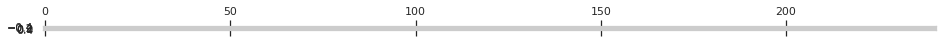

In [27]:
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
# a coef_ attribute or a feature_importances_ attribute
select2 = RFE(SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1), n_features_to_select=207)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)


VC_df = pd.DataFrame(select2.fit_transform(X_train, y_train['Volumetric Capacity']))
print(select2.ranking_)
VC_df.to_csv('../kratosbat/Data/DataForSVR/VC_data.csv')
# visualize the selected features:
mask2 = select2.get_support()
plt.matshow(mask2.reshape(1, -1), cmap='gray_r')

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 27  1  1  1 28 15  1  1  1 37  1 19  1 31  1 30
  5  1  1  1  1  1  6 35 17 22 12  1  1  1  1  1 25  1  1  1  1  1 26  1
  1  1 21  1 20  1  1  1  1  1 16 18  1 11  1 14 23  1  1  1  1  1  1  1
  1  1  1  3 32  1  4  1  1  1  1 36 33  1  1  1  8  1 10  9  1  2 13  1
  1  1  1  1 34  1 29  1  1  7  1  1 24  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1]


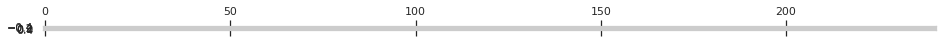

In [28]:
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
#根据a coef_ attribute or a feature_importances_ attribute
select3 = RFE(SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1), n_features_to_select=205)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)


MDV_df = pd.DataFrame(select3.fit_transform(X_train, y_train['Max Delta Volume']))
print(select3.ranking_)
MDV_df.to_csv('../kratosbat/Data/DataForSVR/MDV_data.csv')
# visualize the selected features:
mask3 = select3.get_support()
plt.matshow(mask3.reshape(1, -1), cmap='gray_r')

Now, we use PCA analysis to decrease the dimensionality of our data set.

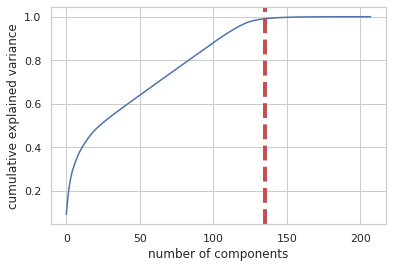

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.090723,0.090723
1,0.164346,0.073622
2,0.219005,0.054660
3,0.257750,0.038745
4,0.287488,0.029738
...,...,...
130,0.986111,0.001337
131,0.987243,0.001132
132,0.988291,0.001048
133,0.989269,0.000978


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

pca_test = PCA(n_components=208)
pca_test.fit(GC_df)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=135, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(135))

Finaly, we write processed data set as .csv files and save in Data directory.

In [33]:
pca = PCA(n_components=133)
newdata=pca.fit_transform(GC_df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

newdf = pd.DataFrame(newdata)
newdf.to_csv('../kratosbat/Data/DataForSVR/GC_CPA.csv')

[0.09072319 0.07362243 0.05465974 0.03874456 0.0297381  0.02141292
 0.02043801 0.016778   0.01619048 0.01523181 0.01253451 0.01203919
 0.01081155 0.01033517 0.01002778 0.00962222 0.00910139 0.00830436
 0.00810924 0.00760343 0.00672269 0.00629434 0.00616012 0.00599403
 0.00590203 0.00574821 0.00568563 0.00557717 0.00546293 0.00528581
 0.00521094 0.0051597  0.00511405 0.00509068 0.00505587 0.00501775
 0.00498636 0.00497546 0.00496625 0.00495371 0.00494086 0.0049339
 0.00491821 0.00491478 0.00490622 0.00489832 0.00489638 0.00489009
 0.00488857 0.00488424 0.00487658 0.00487471 0.00486961 0.00486456
 0.00486046 0.00485785 0.00485605 0.00485294 0.00484939 0.00484565
 0.00484212 0.00483967 0.00483836 0.00483698 0.00483476 0.00483331
 0.0048315  0.00482957 0.00482899 0.00482775 0.0048258  0.00482504
 0.00482349 0.00482277 0.00482211 0.00482094 0.00481997 0.00481945
 0.00481891 0.00481854 0.00481768 0.00481699 0.00481633 0.00481578
 0.0048157  0.00481479 0.0048144  0.00481369 0.00481319 0.00481

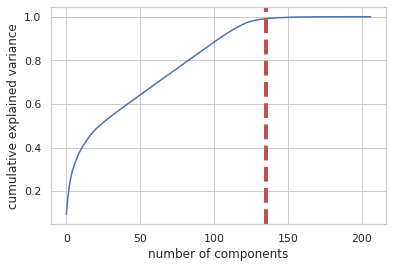

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.092956,0.092956
1,0.165894,0.072938
2,0.221168,0.055274
3,0.259804,0.038636
4,0.289670,0.029865
...,...,...
130,0.986430,0.001169
131,0.987523,0.001093
132,0.988495,0.000972
133,0.989361,0.000866


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

pca_test = PCA(n_components=207)
pca_test.fit(VC_df)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=135, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(135))

In [54]:
pca = PCA(n_components=134)
newdata=pca.fit_transform(VC_df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

newdf = pd.DataFrame(newdata)
newdf.to_csv('./Data/Data for svr/VC_CPA.csv')

[0.08942523 0.07369876 0.05413214 0.03872211 0.02928916 0.02137709
 0.01864974 0.01639569 0.01521721 0.01482406 0.01259719 0.01173583
 0.01062334 0.01009059 0.00984798 0.00949701 0.00907021 0.00838399
 0.00796014 0.00760984 0.00694949 0.00661289 0.0065018  0.00634464
 0.00629644 0.0061584  0.00613292 0.00601347 0.00599607 0.00593075
 0.00592554 0.00591945 0.00591704 0.00591186 0.00590408 0.00590219
 0.00590203 0.00590153 0.00589979 0.00589865 0.00589065 0.00588891
 0.00588574 0.00588047 0.0058665  0.00586449 0.00585056 0.00583896
 0.00580836 0.00575975 0.00573476 0.00569888 0.0056655  0.00559346
 0.0055253  0.00549936 0.00543926 0.00539135 0.00537749 0.00531383
 0.00529108 0.00525394 0.00524701 0.00520453 0.00518302 0.00517162
 0.00515871 0.00513438 0.00509653 0.00508368 0.0050516  0.00503713
 0.0050054  0.00496448 0.00495235 0.00492027 0.00489007 0.00484574
 0.00482864 0.00478569 0.00475796 0.00472206 0.00471007 0.00469355
 0.00468819 0.00464945 0.00462103 0.00457274 0.00456832 0.0045

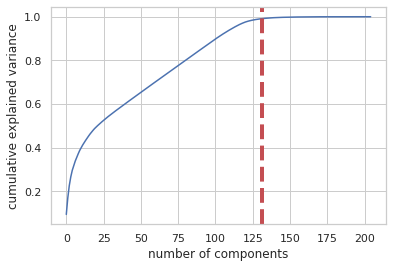

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.093926,0.093926
1,0.169510,0.075585
2,0.225827,0.056317
3,0.265774,0.039947
4,0.295953,0.030179
...,...,...
126,0.986113,0.001353
127,0.987312,0.001198
128,0.988410,0.001099
129,0.989417,0.001007


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

pca_test = PCA(n_components=205)
pca_test.fit(MDV_df)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=131, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(131))

In [39]:
pca = PCA(n_components=131)
newdata=pca.fit_transform(MDV_df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

newdf = pd.DataFrame(newdata)
newdf.to_csv('../kratosbat/Data/DataForSVR/MDV_CPA.csv')

[0.0939258  0.07558467 0.05631687 0.03994698 0.03017879 0.02174647
 0.02075357 0.01708857 0.01648616 0.01538465 0.01269691 0.01219971
 0.01100888 0.0104795  0.01019074 0.00983619 0.00939445 0.00848242
 0.00827287 0.00770839 0.0069057  0.00634345 0.006243   0.00618819
 0.00593051 0.00581788 0.00573269 0.00565698 0.00562053 0.00538179
 0.00529424 0.00523576 0.00521848 0.00515399 0.0051098  0.00509331
 0.00506301 0.00505201 0.00504374 0.00502152 0.00501285 0.00500798
 0.00498902 0.00498675 0.00497973 0.00497474 0.00496868 0.00496436
 0.00495818 0.00495784 0.00494916 0.00494648 0.00494279 0.00493675
 0.00493117 0.00492855 0.00492621 0.00492265 0.00491827 0.0049156
 0.0049131  0.0049109  0.0049094  0.00490751 0.00490685 0.00490297
 0.00490237 0.00490071 0.0048997  0.00489934 0.00489701 0.0048961
 0.00489514 0.00489404 0.00489315 0.00489233 0.00489213 0.0048911
 0.00489064 0.00488981 0.00488844 0.00488795 0.00488711 0.00488703
 0.00488622 0.00488546 0.00488516 0.00488473 0.00488461 0.0048842